<a href="https://colab.research.google.com/github/yujiimt/time_series/blob/master/%E6%99%82%E7%B3%BB%E5%88%97%E8%A7%A3%E6%9E%90_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 時系列解析

時間軸の沿って変化している現象の解析を時系列解析
過去のデータから変動の動向、周期、不規則さなどを予測する手法

時間軸の中で、事象が発生したタイミングで観測されたデータは**点過程**   
これは時系列データではない

時系列データはある時点で観測されたデータと、
１つ前に測定されたデータとの間は直線的に変化すると**仮定**している
その２つのデータが連続していると仮定しているのである


点過程データはその仮定を行わない。なので、縦線で表す(棒グラフではなく、線)
ある事象が発生した時間そのものを分析すること   


連続的に記録されたデータ → **連続時間系列**   
ある時間間隔で観測されたデータ → **離散時間時系列**


　
　
## 定常時系列 と 非定常時系列

時系列データとともに不規則な変動しているが、この変化を確率的なモデルで表現する  
不規則な現象でも、時間的に変化しない一定の確率的モデルの実現値とみなす   
それを**定常時系列**と呼ぶ   
平均が時間と共に変化していたり、   
平均まわりの変動の仕方が時間的に変化しているものを**非定常時系列**


## ガウス型時系列と非ガウス型時系列

時系列データとして観測された値の分布が正規分布に従うものを**ガウス型時系列**   
それ以外を**非ガウス型時系列**と呼ぶ   

変動のパターンに上下非対称性が見られ、そのままでは周辺分布が正規分布と見なせない時系列でも、データを変換させて、近似的にガウス型時系列にすることもできる


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 加法モデルと乗法モデル


なにも加工を施していない時系列データは傾向変動、季節変動、不規則変動の３変動成分に分解することができる


・傾向変動(トレンド) : 時間とともに単調に増加/減少する   
                       長期的、系統的な変動であり、線形関数、非線形関数の形で表す


・季節変動 : 季節によって変動する

・不規則変動 : 上記の２つ以外の説明がつかない不規則かつ短期的に起こる小変動
この変動を誤差的な変動と突発的に生じた特異的な変化と区別する見方もなる

時系列データを３つの成分の合成であると考えたとき、    
合成の仕方として、**合法モデル**と**乗法モデル**がある

加法モデルはそれぞれの成分の和、乗法モデルは積であるとする

O(t) = T(t) + S(t) + I(t)

各変動の関係を比率的に解釈し、原系列データをそれぞれの成分の積で表現する乗法モデルは

O(t) = T(t) * S(t) * I(t)


加法モデルは値が加算されるだけなので、季節変動の幅は一定である    
乗法モデルは、比率が乗じられるのでO(t）の値が大きいと変化幅は大きくなる


不規則変動は傾向変動と季節変動では表現できなかった残差に相当する
傾向変動および季節変動のみで原系列を復元することを考える

In [0]:
df_historical = pd.read_csv('/content/m_quote.csv')

In [0]:
df_historical.head()

,Unnamed: 0,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,NZD,ZAR,BHD,IDR(100),CNY,HKD,INR,MYR,PHP,SGD,KRW(100),THB,KWD,SAR,AED,MXN,PGK,HUF,CZK,PLN,RUB,TRY,IDR(100).1,CNY.1,MYR.1,KRW(100).1,TWD
0,2002/4/30,131.15,189.01,115.97,82.83,79.13,12.73,15.61,15.20,70.24,58.08,11.83,348.32,*****,*****,16.82,2.69,*****,2.58,71.64,9.99,3.02,429.50,34.98,35.71,14.36,*****,*****,*****,*****,NaN,NaN,1.39,15.84,*****,9.99,3.77
1,2002/5/31,126.44,184.56,115.88,81.58,79.60,12.57,15.59,15.43,69.58,58.38,12.51,335.97,*****,*****,16.21,2.60,*****,2.54,70.23,10.1,2.96,417.48,33.73,34.43,13.30,*****,*****,*****,*****,NaN,NaN,1.41,15.28,*****,10.10,3.68
2,2002/6/28,123.53,183.00,117.83,80.64,80.09,12.94,15.86,15.92,70.29,60.48,12.22,328.37,*****,*****,15.84,2.54,*****,2.46,69.27,10.2,2.93,410.12,32.96,33.64,12.67,*****,*****,*****,*****,NaN,NaN,1.44,14.93,*****,10.20,3.66
3,2002/7/31,118.05,183.64,117.23,76.52,80.16,12.67,15.79,15.83,65.42,56.82,11.73,313.77,*****,*****,15.13,2.43,*****,2.34,67.35,9.98,2.86,393.79,31.49,32.15,12.07,*****,*****,*****,*****,NaN,NaN,1.34,14.26,*****,9.98,3.56
4,2002/8/30,119.08,183.14,116.45,75.85,79.60,12.59,15.69,15.68,64.47,55.28,11.31,316.39,*****,*****,15.27,2.46,*****,2.31,67.82,9.97,2.83,396.92,31.77,32.43,12.12,*****,*****,*****,*****,NaN,NaN,1.35,14.39,*****,9.97,3.53


In [0]:
a = df_historical.USD.rolling(24).mean()
b = df_historical.USD.rolling(12).mean()
c = df_historical.USD

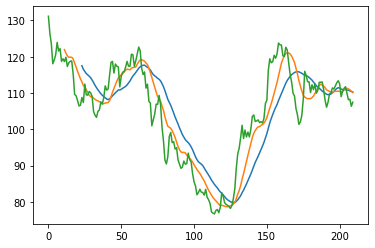

In [0]:
#移動平均を描画

fig, ax = plt.subplots()

ax.plot(a)
ax.plot(b)
ax.plot(c)
plt.show()

In [0]:
ice_cream = pd.read_csv('/content/icecream.csv')
ice_cream.head()

,year,month,expenditure_yen
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632


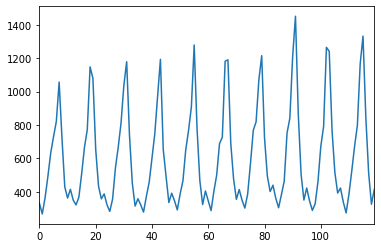

In [0]:
ice_cream.expenditure_yen.plot()

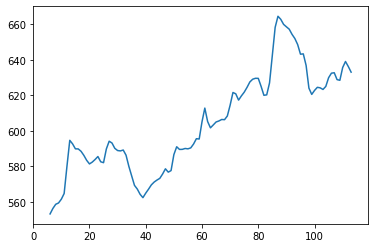

In [0]:
a = ice_cream.expenditure_yen.rolling(window=12).mean().shift(-6)
a.rolling(window=2).mean().plot()

## 季節調整

季節変動を取り除くことで、前月伸び率を計算することが考えられる
移動平均をすることで、これを季節調整とよぶ
季節調整が施されたデータは季節調整済み系列と呼ぶ


季節調整の周期(n)がはっきりしている場合、各周期にわたって
各季節成分の値が一定であれば、n個の移動平均をとることで季節除去できる
移動平均を繰り返すだけでは恣意性があること、不安定性がある

算出平均による移動平均を使ってT成分を求める方法は必ずしも正確とは
言えない。乗法モデルでは変化率の平均を求めたいのであり、本来であれば幾何平均を
取るべきである。

しかし、さほど大きな差がないため、そのまま使用される

1.中心化移動平均を求める: T系列の作成   
2.原系列を中心化移動で徐した値を求め100倍する: S*I系列の作成   
3.手順2で求めた値から12ヶ月ごとの季節指数を求める
当該指数を求めるには,月ごとの平均値を求めた上でその値が1200になるように調整する: S系列の作成    
4.原系列を季節指数で割って、100を掛け、季節調整済みの値とする:T*I系列の作成


季節調整法

センサス局法X-11

季節指数の意味

季節指数の値は、100を1年の平均値と考えた場合の各月の
季節効果を含んだ相対的な値となっている




In [0]:
df_orig_div_cma = ice_cream.expenditure_yen / df_cma

In [0]:
#月ごとに加算

orig_div_cma = df_orig_div_cma.values
s_index = np.zeros(12)
counter = np.zeros(12, dtype = 'i')

for idx in range(len(orig_div_cma)//12):
  # 12か月ごとにデータを抽出
  cut_orig_div_cma = orig_div_cma[idx*12:(idx+1)*12]
  mask = cut_orig_div_cma != cut_orig_div_cma
  #numpy.where を使用して非数（nan) を0にして加算する
  counter += np.where(mask, 0, 1)
  s_index += np.where(mask, 0, cut_orig_div_cma)

#加算結果の各月平均
s_index /= counter
#全体を1200　に合わせ季節指数を計算
s_index = s_index / s_index.sum() * 1200

In [0]:
# 季節指数を原系列の要素と対応させる
# 原系列のスタートが1月なのでnumpy.tileで12か月分の季節指数を繰り返すだけで良い

tiled_s_index = np.tile(s_index, len(orig_div_cma) // 12)

#季節調整済み系列の計算
df_adjust_seriese = ice_cream.expenditure_yen / tiled_s_index * 100

In [0]:
s_index

array([ 57.05374632,  48.4935788 ,  61.87100094,  82.34066594,
       112.21945388, 129.50185932, 178.03993789, 201.78512364,
       122.39560152,  79.21403276,  59.2923283 ,  67.79267067])

In [0]:
100000000 / 1200 * s_index

array([ 4754478.86030336,  4041131.56706274,  5155916.74538307,
        6861722.16182518,  9351621.15707162, 10791821.61036477,
       14836661.49123359, 16815426.96965148, 10199633.4598289 ,
        6601169.39664237,  4941027.35817998,  5649389.22245296])

## 移動平均乖離率


移動平均乖離率は、
移動平均系列と原系列データがどの程度離れているかを示す


移動平均系列が近似的にトレンドを示していると考えられたため、
トレンドからの乖離が大きい場合はその先のデータはトレンドの
方向に戻ってくることができる

移動平均系列との過去の変動を分析することで、
対象としている時系列データとトレンドの乖離のパターンに関するパターンに
関する経験則が明らかになり、原系列データの上昇/下降の変換点に関して知見が得られる

In [0]:
ma24 = df_histrical.USD.rolling(24).mean()
diff_ma24 = (df_historical.USD - 24) / ma24 * 100

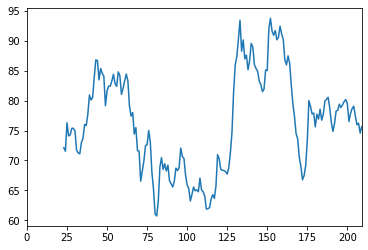

In [0]:
diff_ma24.plot()

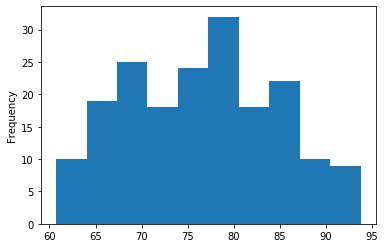

In [0]:
diff_ma24.plot.hist()